In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/adult-income-prediction-dataset")

print("Path to dataset files:", path)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\mosapabdelghany\adult-income-prediction-dataset\versions\1


Dataset shape: (32561, 15)

First few rows:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1 

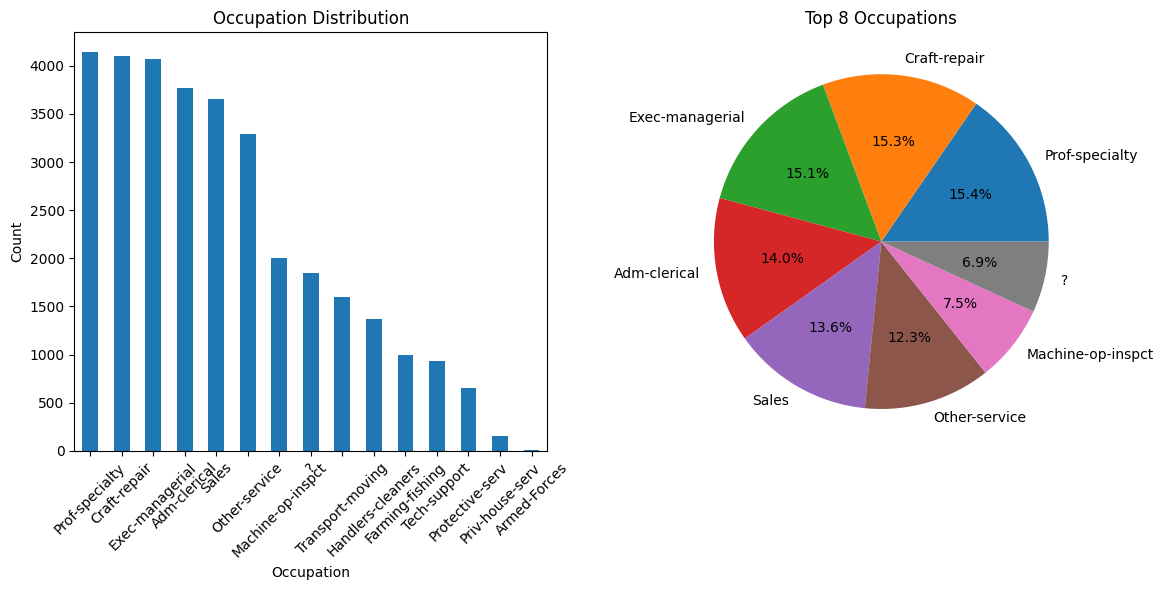


Missing values in occupation: 0


In [4]:


# Load the dataset
df = pd.read_csv(path + '/adult.csv')  

# Let's see the basic structure
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())


print("\nColumn names:")
print(df.columns.tolist())

# Now let's analyze the occupation feature
print("\n=== OCCUPATION ANALYSIS ===")
print("Number of unique occupations:", df['occupation'].nunique())
print("\nOccupation value counts:")
print(df['occupation'].value_counts())
# Here i wanted to see how many diffrent occupaion we have
# Let's see what percentage each occupation represents
print("\nOccupation distribution (%):")
occupation_pct = (df['occupation'].value_counts(normalize=True) * 100).round(2)
print(occupation_pct)

# Visualize the occupation distribution
plt.figure(figsize=(12, 6))
occupation_counts = df['occupation'].value_counts()

# Bar plot
plt.subplot(1, 2, 1)
occupation_counts.plot(kind='bar')
plt.title('Occupation Distribution')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Count')

# Pie chart to see proportions
plt.subplot(1, 2, 2)
top_occupations = occupation_counts.head(8)  # Show top 8
plt.pie(top_occupations.values, labels=top_occupations.index, autopct='%1.1f%%')
plt.title('Top 8 Occupations')

plt.tight_layout()
plt.show()

# Let's also check if there are any missing values in occupation
print(f"\nMissing values in occupation: {df['occupation'].isnull().sum()}")




In [5]:
# Preprocessing: Keep all features for initial modeling

# Create dummy variables for all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Use milder variance threshold (keep more features)
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

# Split data 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 29304 samples, 100 features
Test set: 3257 samples


In [14]:



# Initialize and train logistic regression model
lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on training data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Display classification report
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))


Training Accuracy: 0.8496

Training Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.93      0.90     22228
        True       0.73      0.59      0.66      7076

    accuracy                           0.85     29304
   macro avg       0.81      0.76      0.78     29304
weighted avg       0.84      0.85      0.84     29304



c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Random Forest with Validation Set

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split training data into train and validation sets (80% train, 20% validation)
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Initialize Random Forest with regularization to prevent overfitting
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=200,           
    min_samples_split=10,      # Split even with 2 samples
    min_samples_leaf=5,       # Leaves can have 1 sample
    max_features="sqrt",         # Use all features
    random_state=42
)

# Train on training split
rf_model.fit(X_train_split, y_train_split)

# Predictions on validation set
y_val_pred = rf_model.predict(X_val)

# Validation performance
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Compare with training split performance
y_train_pred = rf_model.predict(X_train_split)
train_accuracy = accuracy_score(y_train_split, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Train-Val Gap: {train_accuracy - val_accuracy:.4f}")

Validation Accuracy: 0.8587

Validation Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.94      0.91      4480
        True       0.76      0.58      0.66      1381

    accuracy                           0.86      5861
   macro avg       0.82      0.76      0.79      5861
weighted avg       0.85      0.86      0.85      5861

Training Accuracy: 0.8795
Train-Val Gap: 0.0208


Epoch [20], Loss: 0.2847, Val Accuracy: 0.8447

Final Validation Accuracy: 0.8447


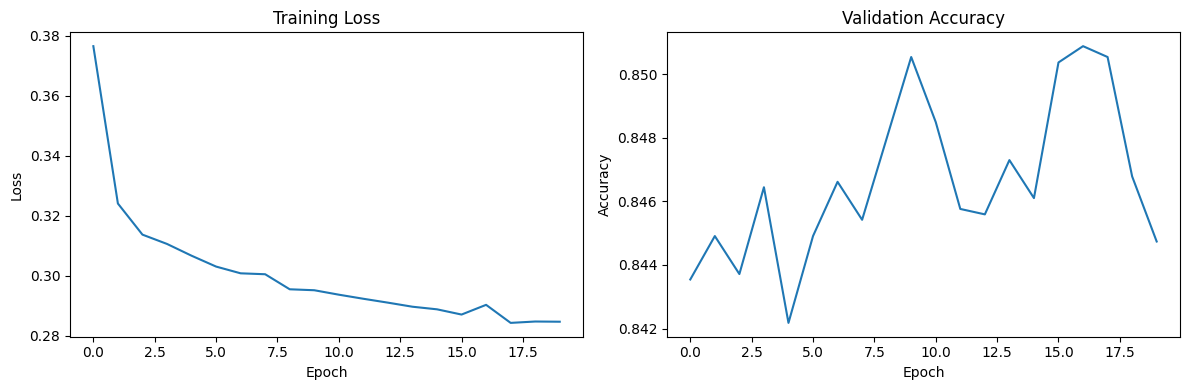

In [10]:
# Neural Network with PyTorch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# Prepare data for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_split.values).reshape(-1, 1)
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.FloatTensor(y_val.values).reshape(-1, 1)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Define neural network architecture
class IncomePredictor(nn.Module):
    def __init__(self, input_size):
        super(IncomePredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.network(x)

# Initialize model
input_size = X_train_scaled.shape[1]
model = IncomePredictor(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
train_losses = []
val_accuracies = []

for epoch in range(20):
    # Training
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    
    val_accuracy = correct / total
    train_losses.append(train_loss / len(train_loader))
    val_accuracies.append(val_accuracy)
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}], Loss: {train_loss/len(train_loader):.4f}, Val Accuracy: {val_accuracy:.4f}')

print(f'\nFinal Validation Accuracy: {val_accuracies[-1]:.4f}')

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(val_accuracies)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [15]:
# XGBoost Model Implementation

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    random_state=42,
    eval_metric='error',
    n_jobs=-1
)

# Train the model
xgb_model.fit(X_train_split, y_train_split)

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train_split)
y_val_pred_xgb = xgb_model.predict(X_val)

# Calculate accuracies
train_accuracy_xgb = accuracy_score(y_train_split, y_train_pred_xgb)
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)

print(f"XGBoost Training Accuracy: {train_accuracy_xgb:.4f}")
print(f"XGBoost Validation Accuracy: {val_accuracy_xgb:.4f}")
print(f"Train-Val Gap: {train_accuracy_xgb - val_accuracy_xgb:.4f}")

# Detailed performance report
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_xgb))

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'feature': X_train_split.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)



XGBoost Training Accuracy: 0.9068
XGBoost Validation Accuracy: 0.8638
Train-Val Gap: 0.0429

Validation Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.93      0.91      4480
        True       0.74      0.65      0.69      1381

    accuracy                           0.86      5861
   macro avg       0.82      0.79      0.80      5861
weighted avg       0.86      0.86      0.86      5861



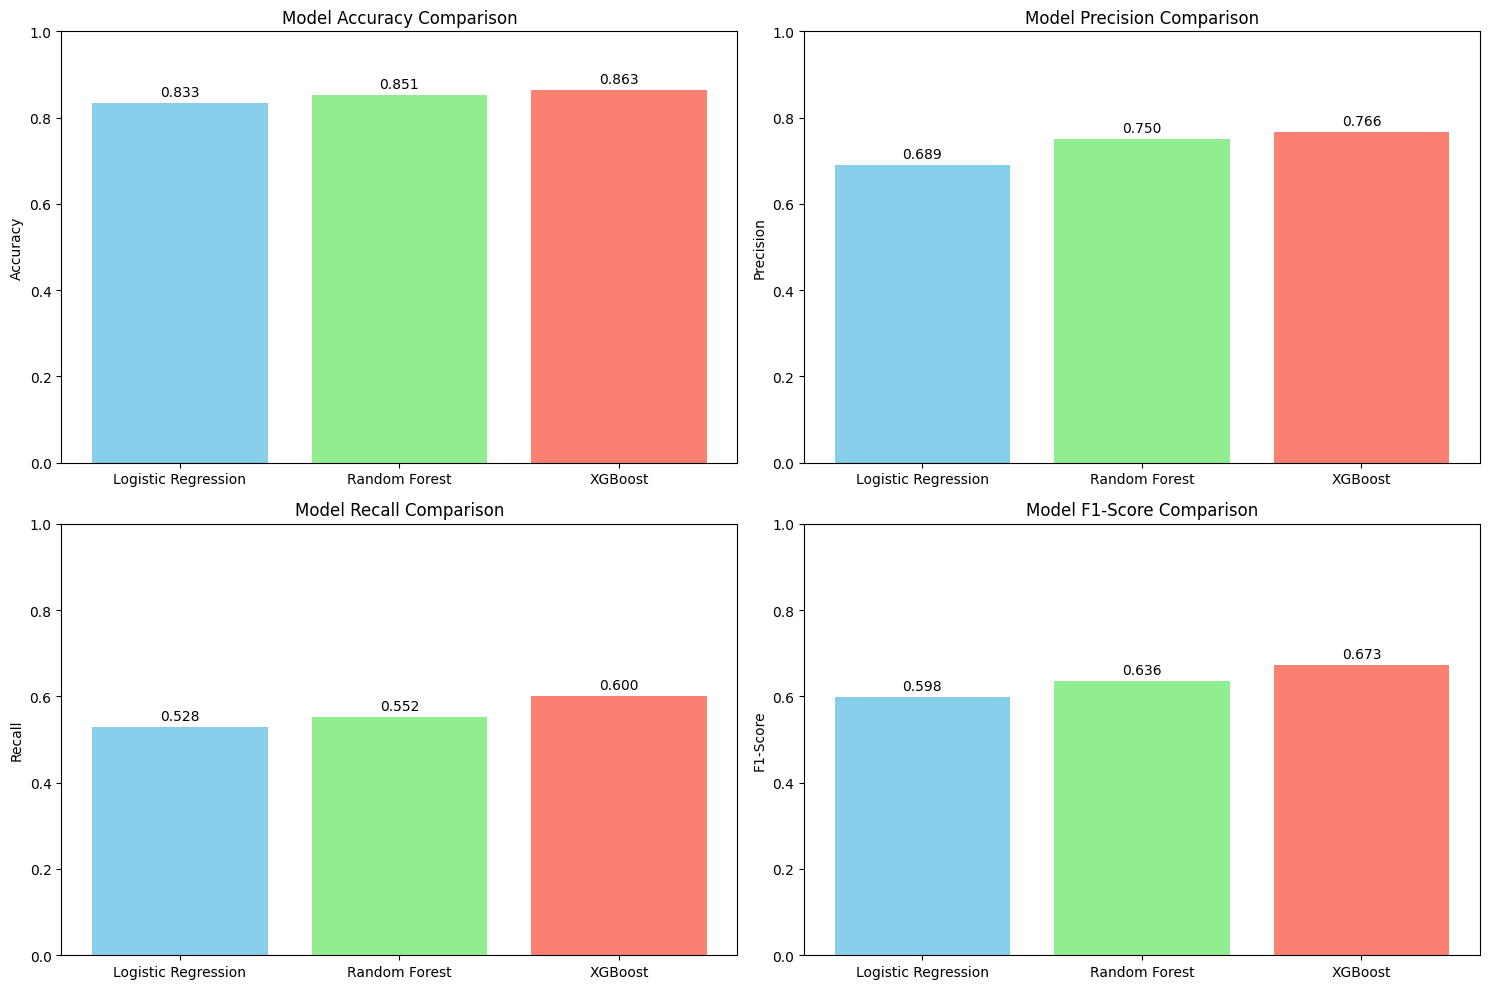

Detailed Test Set Performance:

Logistic Regression:
  Accuracy:  0.8333
  Precision: 0.6894
  Recall:    0.5281
  F1-Score:  0.5981

Random Forest:
  Accuracy:  0.8514
  Precision: 0.7496
  Recall:    0.5516
  F1-Score:  0.6355

XGBoost:
  Accuracy:  0.8631
  Precision: 0.7663
  Recall:    0.6000
  F1-Score:  0.6730

🎯 Best Model: XGBoost with 0.8631 accuracy


In [16]:
# Model Comparison Visualization

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Dictionary of models
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model, 
    'XGBoost': xgb_model
}

# Calculate metrics for each model
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Accuracy Comparison
accuracies = [results[model]['accuracy'] for model in models]
ax1.bar(models.keys(), accuracies, color=['skyblue', 'lightgreen', 'salmon'])
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Plot 2: Precision Comparison
precisions = [results[model]['precision'] for model in models]
ax2.bar(models.keys(), precisions, color=['skyblue', 'lightgreen', 'salmon'])
ax2.set_title('Model Precision Comparison')
ax2.set_ylabel('Precision')
ax2.set_ylim(0, 1)
for i, v in enumerate(precisions):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Plot 3: Recall Comparison
recalls = [results[model]['recall'] for model in models]
ax3.bar(models.keys(), recalls, color=['skyblue', 'lightgreen', 'salmon'])
ax3.set_title('Model Recall Comparison')
ax3.set_ylabel('Recall')
ax3.set_ylim(0, 1)
for i, v in enumerate(recalls):
    ax3.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Plot 4: F1-Score Comparison
f1_scores = [results[model]['f1'] for model in models]
ax4.bar(models.keys(), f1_scores, color=['skyblue', 'lightgreen', 'salmon'])
ax4.set_title('Model F1-Score Comparison')
ax4.set_ylabel('F1-Score')
ax4.set_ylim(0, 1)
for i, v in enumerate(f1_scores):
    ax4.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed results
print("Detailed Test Set Performance:")
print("="*50)
for name in models.keys():
    print(f"\n{name}:")
    print(f"  Accuracy:  {results[name]['accuracy']:.4f}")
    print(f"  Precision: {results[name]['precision']:.4f}")
    print(f"  Recall:    {results[name]['recall']:.4f}")
    print(f"  F1-Score:  {results[name]['f1']:.4f}")

# Find best model
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
print(f"\n🎯 Best Model: {best_model[0]} with {best_model[1]['accuracy']:.4f} accuracy")